![](/kaggle/input/image-data/1e29ddb72c077c53b87ee743701f0bb9.jpg)

# **🌟 Introduction:**

**Welcome to Part 1 of this series! This notebook focuses on data preprocessing and model training for the insurance premium prediction competition. Exploratory Data Analysis (EDA) and data visualization will be presented in Part 2.**

**🎯 Goal**


**1.Predict insurance premium amounts based on training data features.**

**2.The evaluation metric is RMSLE, which penalizes under-predictions more than over-predictions. Predictions must be non-negative since premiums cannot be negative.**

**3.The premium is typically calculated based on factors that:Reflect the risk of insuring a customer (e.g., age, health score, vehicle age, etc.).Affect the policy cost (e.g., credit score, insurance duration, policy type).**











# **🧠 Data Understanding:**

**📚 Import Necessary Libraries**

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost
from xgboost import XGBRegressor,plot_importance
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [56]:
train_data=pd.read_csv("/kaggle/input/playground-series-s4e12/train.csv")
test_data=pd.read_csv("/kaggle/input/playground-series-s4e12/test.csv")

In [57]:
train_data

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,...,NaN,5.0,372.0,3.0,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,1303.0
1199996,1199996,54.0,Male,35786.0,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,...,NaN,10.0,597.0,4.0,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment,821.0
1199997,1199997,19.0,Male,51884.0,Divorced,0.0,Master's,NaN,14.724469,Suburban,...,0.0,19.0,NaN,6.0,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo,371.0
1199998,1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,...,1.0,7.0,407.0,4.0,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment,596.0


In [58]:
test_data

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,1999995,50.0,Female,38782.0,Married,1.0,Bachelor's,NaN,14.498639,Rural,Premium,NaN,8.0,309.0,2.0,2021-07-09 15:21:39.184157,Average,Yes,Daily,Condo
799996,1999996,NaN,Female,73462.0,Single,0.0,Master's,NaN,8.145748,Rural,Basic,2.0,0.0,NaN,2.0,2023-03-28 15:21:39.250151,Good,No,Daily,Apartment
799997,1999997,26.0,Female,35178.0,Single,0.0,Master's,Employed,6.636583,Urban,Comprehensive,NaN,10.0,NaN,6.0,2019-09-30 15:21:39.132191,Poor,No,Monthly,Apartment
799998,1999998,34.0,Female,45661.0,Single,3.0,Master's,NaN,15.937248,Urban,Premium,2.0,17.0,467.0,7.0,2022-05-09 15:21:39.253660,Average,No,Weekly,Condo


In [59]:
print('train data: ', train_data.shape)
print('test data: ', test_data.shape)

train data:  (1200000, 21)
test data:  (800000, 20)


In [60]:
print("train data:", train_data.columns)
print("test data:", test_data.columns)

train data: Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')
test data: Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type'],
      dtype='object')


In [61]:
train_data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,1200000.0,599999.50,346410.31,0.00,299999.75,599999.50,899999.25,1199999.00
Age,1181295.0,41.15,13.54,18.00,30.00,41.00,53.00,64.00
Annual Income,1155051.0,32745.22,32179.51,1.00,8001.00,23911.00,44634.00,149997.00
Number of Dependents,1090328.0,2.01,1.42,0.00,1.00,2.00,3.00,4.00
Health Score,1125924.0,25.61,12.20,2.01,15.92,24.58,34.53,58.98
Previous Claims,835971.0,1.00,0.98,0.00,0.00,1.00,2.00,9.00
Vehicle Age,1199994.0,9.57,5.78,0.00,5.00,10.00,15.00,19.00
Credit Score,1062118.0,592.92,149.98,300.00,468.00,595.00,721.00,849.00
Insurance Duration,1199999.0,5.02,2.59,1.00,3.00,5.00,7.00,9.00
Premium Amount,1200000.0,1102.54,865.00,20.00,514.00,872.00,1509.00,4999.00


**🔍 Explore Columns and Data Types**

**📝 Column Description **

- id: Unique identifier for each customer.

- Age: Age of the customer in years.

- Gender: Gender of the customer (e.g., Male, Female).

- Annual Income: Annual income of the customer in currency units.

- Marital Status: Marital status of the customer (e.g., Single, Married).

- Number of Dependents: Number of dependents the customer has.(Number of Dependents refers to the number of individuals financially dependent on the customer. These could include children, elderly parents, or any other family members who rely on the customer for financial support.)

- Education Level: Customer's highest level of education.

- Occupation: Customer's occupation or job role.

- Health Score: A numerical representation of the customer's health condition.

- Location: Geographic location of the customer.

- Policy Type: Type of insurance policy the customer holds.

- Previous Claims: Number of previous insurance claims made by the customer.

- Vehicle Age: Age of the vehicle in years.

- Credit Score: Customer's creditworthiness score.

- Insurance Duration: Duration of the current insurance policy.

- Policy Start Date: Start date of the insurance policy.

- Customer Feedback: Feedback or ratings provided by the customer.

- Smoking Status: Whether the customer is a smoker or not.

- Exercise Frequency: Frequency of physical exercise by the customer.

- Property Type: Type of property the customer owns (e.g., Apartment, House).

- Premium Amount: The amount paid as the insurance premium.

In [62]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [63]:
train_data.drop(columns=['id'],inplace=True)

In [64]:
train_data["Policy Start Date"] = pd.to_datetime(train_data["Policy Start Date"], errors='coerce', format='%Y-%m-%d')

In [65]:
train_data

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,NaT,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,NaT,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,NaT,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,NaT,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,NaT,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,Premium,NaN,5.0,372.0,3.0,NaT,Poor,No,Daily,Apartment,1303.0
1199996,54.0,Male,35786.0,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,Comprehensive,NaN,10.0,597.0,4.0,NaT,Poor,No,Weekly,Apartment,821.0
1199997,19.0,Male,51884.0,Divorced,0.0,Master's,NaN,14.724469,Suburban,Basic,0.0,19.0,NaN,6.0,NaT,Good,No,Monthly,Condo,371.0
1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,Premium,1.0,7.0,407.0,4.0,NaT,Poor,No,Daily,Apartment,596.0


**🚨 Missing Values and Duplicate Values**

In [66]:
train_data.isnull().sum()

Age                       18705
Gender                        0
Annual Income             44949
Marital Status            18529
Number of Dependents     109672
Education Level               0
Occupation               358075
Health Score              74076
Location                      0
Policy Type                   0
Previous Claims          364029
Vehicle Age                   6
Credit Score             137882
Insurance Duration            1
Policy Start Date       1200000
Customer Feedback         77824
Smoking Status                0
Exercise Frequency            0
Property Type                 0
Premium Amount                0
dtype: int64

In [67]:
train_data.duplicated().sum()

1

**🔢 Numerical and Categorical Columns**

In [68]:
tar_col ='Premium Amount';
num_col = train_data.select_dtypes(include = ['number']).columns
cat_col = train_data.select_dtypes(include = ['object']).columns
print("Target Column :" ,tar_col)
print( "\nNumerical Columns :" , num_col.tolist())
print( "\nCategorical Columns :" , cat_col.tolist())

Target Column : Premium Amount

Numerical Columns : ['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount']

Categorical Columns : ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']


In [69]:
num_data=train_data.select_dtypes(include=['number'])
cat_data=train_data.select_dtypes(include=['object'])

In [70]:
print('Numerical Data Distribution!')
num_data.describe().round(2).T

Numerical Data Distribution!


,count,mean,std,min,25%,50%,75%,max
Age,1181295.0,41.15,13.54,18.00,30.00,41.00,53.00,64.00
Annual Income,1155051.0,32745.22,32179.51,1.00,8001.00,23911.00,44634.00,149997.00
Number of Dependents,1090328.0,2.01,1.42,0.00,1.00,2.00,3.00,4.00
Health Score,1125924.0,25.61,12.20,2.01,15.92,24.58,34.53,58.98
Previous Claims,835971.0,1.00,0.98,0.00,0.00,1.00,2.00,9.00
Vehicle Age,1199994.0,9.57,5.78,0.00,5.00,10.00,15.00,19.00
Credit Score,1062118.0,592.92,149.98,300.00,468.00,595.00,721.00,849.00
Insurance Duration,1199999.0,5.02,2.59,1.00,3.00,5.00,7.00,9.00
Premium Amount,1200000.0,1102.54,865.00,20.00,514.00,872.00,1509.00,4999.00


In [71]:
print("Categorical Data Dsicription!")
cat_data.describe().T

Categorical Data Dsicription!


,count,unique,top,freq
Gender,1200000,2,Male,602571
Marital Status,1181471,3,Single,395391
Education Level,1200000,4,Master's,303818
Occupation,841925,3,Employed,282750
Location,1200000,3,Suburban,401542
Policy Type,1200000,3,Premium,401846
Customer Feedback,1122176,3,Average,377905
Smoking Status,1200000,2,Yes,601873
Exercise Frequency,1200000,4,Weekly,306179
Property Type,1200000,3,House,400349


In [72]:
for c in cat_data:
    col_count=train_data[c].nunique()
    print(f'{c} has {col_count} unqiue_values: ')
    print("--"*20)

Gender has 2 unqiue_values: 
----------------------------------------
Marital Status has 3 unqiue_values: 
----------------------------------------
Education Level has 4 unqiue_values: 
----------------------------------------
Occupation has 3 unqiue_values: 
----------------------------------------
Location has 3 unqiue_values: 
----------------------------------------
Policy Type has 3 unqiue_values: 
----------------------------------------
Customer Feedback has 3 unqiue_values: 
----------------------------------------
Smoking Status has 2 unqiue_values: 
----------------------------------------
Exercise Frequency has 4 unqiue_values: 
----------------------------------------
Property Type has 3 unqiue_values: 
----------------------------------------


In [73]:
for i in cat_col:
    cat_value=train_data[i].value_counts()
    print(f"Value Count for {i}")
    print(cat_value)
    print("*"*40)

Value Count for Gender
Gender
Male      602571
Female    597429
Name: count, dtype: int64
****************************************
Value Count for Marital Status
Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64
****************************************
Value Count for Education Level
Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64
****************************************
Value Count for Occupation
Occupation
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64
****************************************
Value Count for Location
Location
Suburban    401542
Rural       400947
Urban       397511
Name: count, dtype: int64
****************************************
Value Count for Policy Type
Policy Type
Premium          401846
Comprehensive    399600
Basic            398554
Name: count, dtype: int64
***********************

# **🛠️ Data Preprocessing**

**📊 Check the Percentage of Rows Affected**

In [74]:
# Percentage of rows with nulls in 'Occupation' and 'Previous Claims'
affected_rows = train_data[train_data['Occupation'].isnull() | train_data['Previous Claims'].isnull()]
print(len(affected_rows) / len(train_data) * 100)


51.102916666666665


- If a large percentage of rows >20% are affected, dropping these rows might harm the dataset's quality.

**⚙️ Feature Engineering:**

In [75]:
def date_trans(df):
    df['Policy Start Date']= pd.to_datetime(df['Policy Start Date'])
    df['Year'] = df['Policy Start Date'].dt.year
    df['Day'] = df['Policy Start Date'].dt.day
    df['Month'] = df['Policy Start Date'].dt.month
    df.drop('Policy Start Date' , axis =1, inplace = True)
    return df


train_data = date_trans(train_data)
test_data = date_trans(test_data)

In [76]:
X=train_data.drop(columns=['Premium Amount' ])
y=train_data['Premium Amount']

In [77]:
num_col=num_col.drop(['Premium Amount'])

**⚖️ Feature Scaling & Encoding**

In [78]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    # ('scaler', StandardScaler())                       # Scale numerical features
])

# Preprocessing pipeline for categorical features
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))                      # Encode categorical features
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_col),
        ('cat', cat_pipeline, cat_col)
    ]
)
X_processed = preprocessor.fit_transform(X)
test_transformed = preprocessor.transform(test_data.drop(columns=['id']))


# **📐 Train-Test Split:**

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X_processed,y,test_size=0.2,random_state=42)

# **🤖 Model Training with Multiple Models**

In [80]:
models={'linear Regression': LinearRegression(),
       'Decisoin Tree ': DecisionTreeRegressor(),
       'XGBoost':XGBRegressor()
       }

#train and evaluate each model
for model_name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    rmsle= np.sqrt(mean_squared_log_error(y_test,y_pred))
    
    print(f'{model_name} Accuracy : {rmsle}')
    

linear Regression Accuracy : 1.168050946612354
Decisoin Tree  Accuracy : 1.5167020591063634
XGBoost Accuracy : 1.1430533470351973


**XGBoost is the best model among the ones tested, as it achieves the lowest RMSLE, meaning it makes the most accurate predictions (with minimal penalty for under-predictions)**

# **🎛️ Hyperparameter Tuning:**

In [81]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [82]:
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split

y_shifted = y - y.min() + 1   # This ensures all values are positive

def objective(trial):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y_shifted, test_size=0.2, random_state=42)

    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    subsample = trial.suggest_float('subsample', 0.6, 1.0)

    # Train the model (e.g., XGBoost)
    from xgboost import XGBRegressor
    model = XGBRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        random_state=42
    )

    model.fit(X_train, y_train)

    # Predict and calculate RMSLE
    y_pred = model.predict(X_test)
    rmsle = mean_squared_log_error(y_test, y_pred, squared=False)
    return rmsle  # Optuna minimizes this metric


In [83]:
import optuna

study = optuna.create_study(direction='minimize', study_name='RMSLE_Optimization')

# Set n_trials to 50 and timeout to 1800 seconds (30 minutes)
study.optimize(objective, n_trials=50, timeout=1800)  # 50 trials, 30 minutes max time
# Best parameters and score
#print("Best Parameters:", study.best_params)
#print("Best RMSLE:", study.best_value)


[I 2024-12-31 19:10:27,509] A new study created in memory with name: RMSLE_Optimization
[I 2024-12-31 19:10:57,130] Trial 0 finished with value: 1.3523514632187532 and parameters: {'n_estimators': 175, 'max_depth': 12, 'learning_rate': 0.06172569532634977, 'subsample': 0.9051673687711143}. Best is trial 0 with value: 1.3523514632187532.
[W 2024-12-31 19:11:16,745] Trial 1 failed with parameters: {'n_estimators': 157, 'max_depth': 10, 'learning_rate': 0.2996541672429211, 'subsample': 0.8609749744687976} because of the following error: ValueError('Mean Squared Logarithmic Error cannot be used when targets contain negative values.').
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-82-404da3fc26ff>", line 30, in objective
    rmsle = mean_squared_log_error(y_test, y_pred, squared=False)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metric

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [84]:
best_parameter={'n_estimators': 480, 'max_depth': 4, 'learning_rate': 0.14750972264306628, 'subsample': 0.6858914931937488}

In [85]:
best_params = study.best_params
final_model = XGBRegressor(**best_params, random_state=42)
final_model.fit(X_processed, y)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06172569532634977,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=175, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# **📊 Model Evaluation:**

In [86]:
y_test = np.nan_to_num(y_test)


RMSLE : 1.0794500064626806 


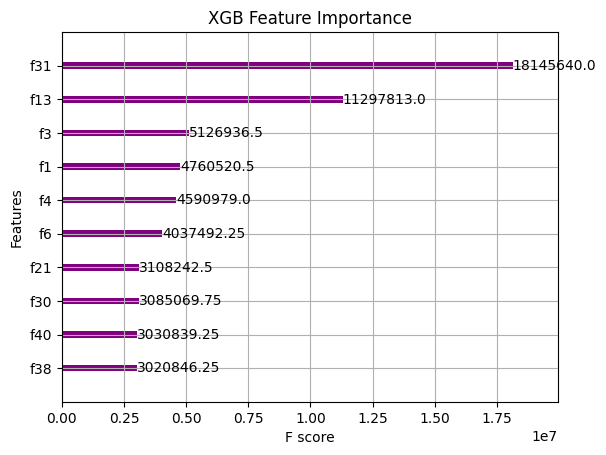

In [87]:
y_pred = final_model.predict(X_test)
rmsle= np.sqrt(mean_squared_log_error(y_test,y_pred))
print(f"RMSLE : {rmsle} " )


plot_importance(final_model, importance_type='gain', title='XGB Feature Importance', max_num_features=10, color='purple')
sns.set_palette('viridis')


# **📤 Submission:**

In [88]:
output= pd.DataFrame(test_data['id'])
xgb_output = final_model.predict(test_transformed)
output['Premium Amount']= xgb_output
output.to_csv("/kaggle/working/submission.csv", index = None)
output.head(10)

,id,Premium Amount
0,1200000,1031.659668
1,1200001,1163.149536
2,1200002,1005.137268
3,1200003,1151.467041
4,1200004,1018.036194
5,1200005,1153.635254
6,1200006,1277.016479
7,1200007,980.318848
8,1200008,371.767334
9,1200009,1123.454956


# **🔚 Conclusion:**

**After performing data preprocessing and hyperparameter tuning using Optuna, we improved the XGBoost model's RMSLE from 1.14 to 1.079.**

**Initial Performance:** The model before tuning had an RMSLE of 1.14, indicating some under-predictions.

**After Optuna Tuning:** Hyperparameter optimization reduced the RMSLE to 1.079, reflecting better model accuracy and more precise predictions of insurance premiums.

**Dataset Insights:** The model is now better at capturing the relationships between features like age, health score, and credit score, improving premium prediction accuracy.

**Overall, Optuna tuning significantly improved model performance, making the model more reliable for predicting insurance premiums.**

# **🚀 If you found this notebook helpful, insightful, or inspiring, I would truly appreciate your upvote! Your support can help bring this notebook to the spotlight and make it shine in the competition🏆✨

# **Thank you for your time and encouragement! 😊**

